<a href="https://colab.research.google.com/github/dots13/ForecastingStickerSalesKaggle/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Exploring

In [ ]:
train.head()

id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0

In [ ]:
print("Shape of traing data:",train.shape)
print("Shape of testing data:", test.shape)

Shape of traing data: (230130, 6)
Shape of testing data: (98550, 5)


In [ ]:
# Check for missing values
print(train.isnull().sum())

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


In [ ]:
train.nunique()

id          230130
date          2557
country          6
store            3
product          5
num_sold      4037
dtype: int64

In [ ]:
train.describe()

id       num_sold
count  230130.000000  221259.000000
mean   115064.500000     752.527382
std     66432.953062     690.165445
min         0.000000       5.000000
25%     57532.250000     219.000000
50%    115064.500000     605.000000
75%    172596.750000    1114.000000
max    230129.000000    5939.000000

In [ ]:
train.describe(include=['object'])

date country              store            product
count       230130  230130             230130             230130
unique        2557       6                  3                  5
top     2010-01-01  Canada  Discount Stickers  Holographic Goose
freq            90   38355              76710              46026

In [ ]:
train['country'].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [ ]:
train = train.dropna()
test = test.dropna()

# Charts
## 1. Time Series Chart

In [ ]:
data_grouped = train.groupby('date')['num_sold'].sum().reset_index()
fig = px.line(data_grouped, x='date', y='num_sold', title='Total Products Sold Over Time', labels={'num_sold': 'Number Sold'})
fig.show()

## 2. Bar Chart: Sales by Country

In [ ]:
country_sales = train.groupby('country')['num_sold'].sum().reset_index()

fig = px.bar(country_sales, x='country', y='num_sold', text='num_sold', title='Total Products Sold by Country', labels={'num_sold': 'Number Sold'})
fig.show()

## 3. Bar Chart: Sales by Product

In [ ]:
product_sales = train.groupby('product')['num_sold'].sum().reset_index()

fig = px.bar(product_sales, x='product', y='num_sold',  text='num_sold', title='Total Products Sold by Product', labels={'num_sold': 'Number Sold'})
fig.update_xaxes(tickangle=45)
fig.show()

# 5. Heatmap: Sales Distribution Over Time

In [ ]:
train.loc[:, 'year'] = pd.to_datetime(train['date']).dt.year
train.loc[:, 'month'] = pd.to_datetime(train['date']).dt.month

heatmap_data = train.groupby(['year', 'month'])['num_sold'].sum().reset_index()

fig = px.density_heatmap(heatmap_data, x='month', y='year', z='num_sold', color_continuous_scale='Viridis',
                         title='Sales Distribution Over Time', labels={'num_sold': 'Number Sold'})
fig.show()

## 6. Pie Chart: Proportion of Sales by Store

In [ ]:
store_sales = train.groupby('store')['num_sold'].sum().reset_index()

fig = px.pie(store_sales, names='store', values='num_sold', title='Proportion of Sales by Store')
fig.show()

## 7. Box Plot: Distribution of Sales by Country

In [ ]:
fig = px.box(train, x='country', y='num_sold', title='Distribution of Sales by Country', labels={'num_sold': 'Number Sold'})
fig.show()

# Trends
## Sales Trends by Country
This line plot shows sales trends by country each month. The x-axis shows the months, and the y-axis shows how many products were sold. The plot helps you see which months had higher or lower sales for each country.

In [ ]:
monthly_country_sales = train.groupby(['country', 'month'])['num_sold'].sum().reset_index()

fig = px.line(monthly_country_sales, x='month', y='num_sold', color='country',
              title='Sales Trends by Country (Month-wise)',
              labels={'num_sold': 'Number of Products Sold', 'month': 'Month'},
              markers=True)

fig.show()

## Sales Trends by Product (Month-wise)
This line plot shows sales trends by product each month. The x-axis represents the months, and the y-axis shows the total number of products sold.

In [ ]:
monthly_product_sales = train.groupby(['product', 'month'])['num_sold'].sum().reset_index()

fig = px.line(monthly_product_sales, x='month', y='num_sold', color='product',
              title='Sales Trends by Product (Month-wise)',
              labels={'num_sold': 'Number of Products Sold', 'month': 'Month'},
              markers=True)

fig.show()

# Store-Level Sales Trends (Month-wise)
This line plot shows sales trends by store each month. The x-axis represents the months, and the y-axis shows the total number of products sold.

In [ ]:
monthly_store_sales = train.groupby(['store', 'month'])['num_sold'].sum().reset_index()

fig = px.line(monthly_store_sales, x='month', y='num_sold', color='store',
              title='Store-Level Sales Trends (Month-wise)',
              labels={'num_sold': 'Number of Products Sold', 'month': 'Month'},
              markers=True)

fig.show()


## Weekly aggregation plot

In [ ]:
train

id        date    country                 store  \
1            1  2010-01-01     Canada     Discount Stickers   
2            2  2010-01-01     Canada     Discount Stickers   
3            3  2010-01-01     Canada     Discount Stickers   
4            4  2010-01-01     Canada     Discount Stickers   
5            5  2010-01-01     Canada     Stickers for Less   
...        ...         ...        ...                   ...   
230125  230125  2016-12-31  Singapore  Premium Sticker Mart   
230126  230126  2016-12-31  Singapore  Premium Sticker Mart   
230127  230127  2016-12-31  Singapore  Premium Sticker Mart   
230128  230128  2016-12-31  Singapore  Premium Sticker Mart   
230129  230129  2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  year  month  
1                   Kaggle     973.0  2010      1  
2             Kaggle Tiers     906.0  2010      1  
3                 Kerneler     423.0  2010      1  
4       Kerneler Dark Mode     491.0  2010      1  
5        Holographic Goose     300.0  2010      1  
...                    ...       ...   ...    ...  
230125   Holographic Goose     466.0  2016     12  
230126              Kaggle    2907.0  2016     12  
230127        Kaggle Tiers    2299.0  2016     12  
230128            Kerneler    1242.0  2016     12  
230129  Kerneler Dark Mode    1622.0  2016     12  

[221259 rows x 8 columns]

In [ ]:
train['date'] = pd.to_datetime(train['date'])
weekly_df = train.groupby([pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train.groupby([pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()


fig_weekly = px.line(weekly_df[1:-1], x='date', y='num_sold',
                     title='Sales Trends by Week',
                     labels={'num_sold': 'Number of Products Sold', 'date': 'Week'},
                     markers=True)
fig_weekly.show()

# Monthly aggregation plot
fig_monthly = px.line(monthly_df, x='date', y='num_sold',
                      title='Sales Trends by Month',
                      labels={'num_sold': 'Number of Products Sold', 'date': 'Month'},
                      markers=True)
fig_monthly.show()

# Seasonal Component Plot
The Seasonal Component Plot illustrates the recurring sales patterns monthly cycles.

<ipython-input-23-d369a6180fec>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



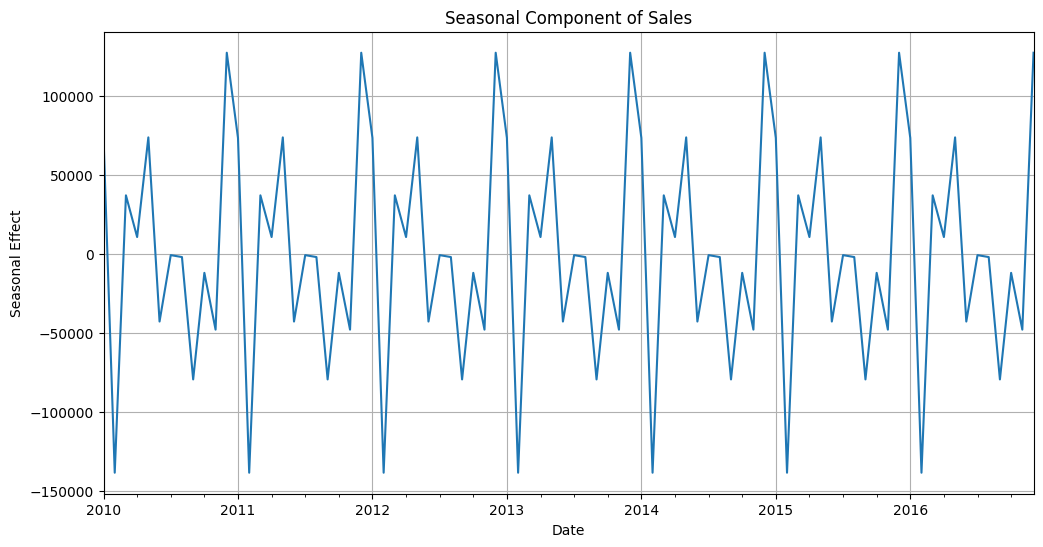

In [ ]:
train_index = train[:]
train_index['date'] = pd.to_datetime(train_index['date'])

train_index.set_index('date', inplace=True)

monthly_sales = train_index.resample('M')['num_sold'].sum()

decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

plt.figure(figsize=(12, 6))
decomposition.seasonal.plot()
plt.title('Seasonal Component of Sales')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()

# Autocorrelation (ACF) Plot

<Figure size 1000x600 with 0 Axes>

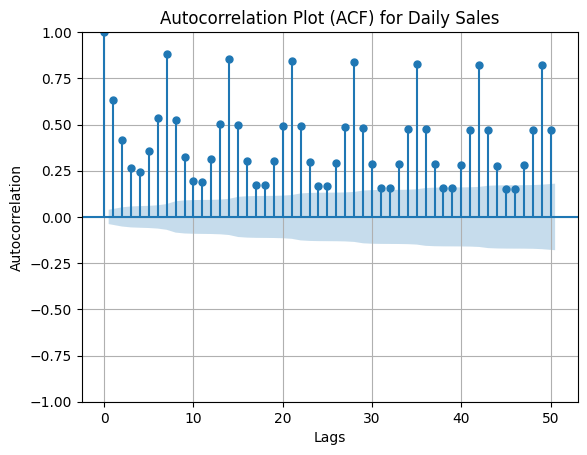

In [ ]:
trend_data = train.groupby('date')['num_sold'].sum()

plt.figure(figsize=(10, 6))
plot_acf(trend_data.dropna(), lags=50)
plt.title('Autocorrelation Plot (ACF) for Daily Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


<ipython-input-25-60b30059a3bf>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Figure size 1200x600 with 0 Axes>

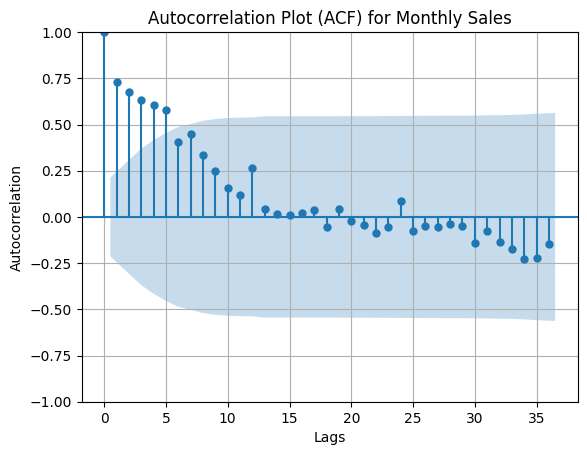

In [ ]:
monthly_sales = train_index.resample('M')['num_sold'].sum()

plt.figure(figsize=(12, 6))
plot_acf(monthly_sales, lags=36)
plt.title('Autocorrelation Plot (ACF) for Monthly Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
train

id       date    country                 store  \
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
5            5 2010-01-01     Canada     Stickers for Less   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  year  month  
1                   Kaggle     973.0  2010      1  
2             Kaggle Tiers     906.0  2010      1  
3                 Kerneler     423.0  2010      1  
4       Kerneler Dark Mode     491.0  2010      1  
5        Holographic Goose     300.0  2010      1  
...                    ...       ...   ...    ...  
230125   Holographic Goose     466.0  2016     12  
230126              Kaggle    2907.0  2016     12  
230127        Kaggle Tiers    2299.0  2016     12  
230128            Kerneler    1242.0  2016     12  
230129  Kerneler Dark Mode    1622.0  2016     12  

[221259 rows x 8 columns]

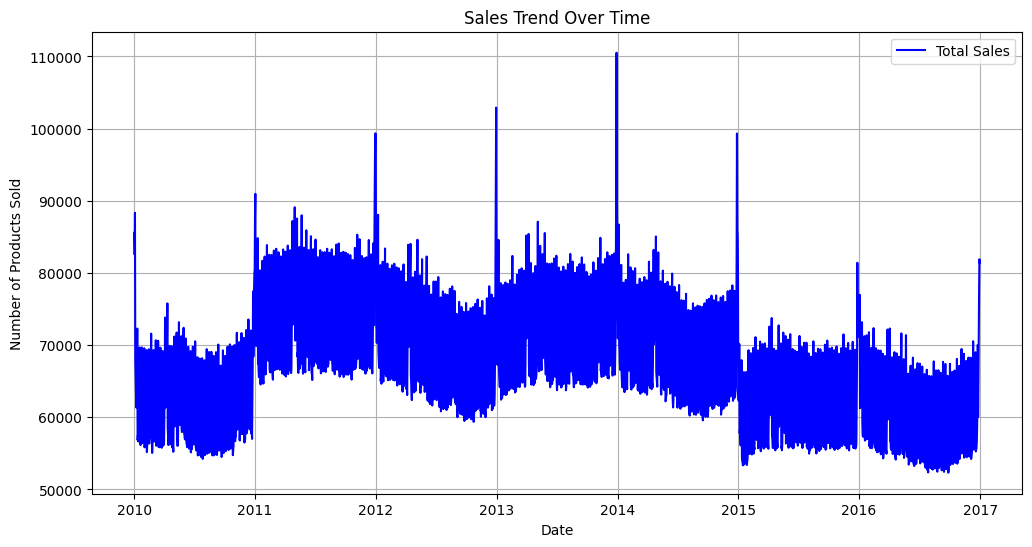

In [ ]:
trend_data = train.groupby("date")["num_sold"].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(trend_data, label="Total Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Number of Products Sold")
plt.title("Sales Trend Over Time")
plt.legend()
plt.grid()
plt.show()

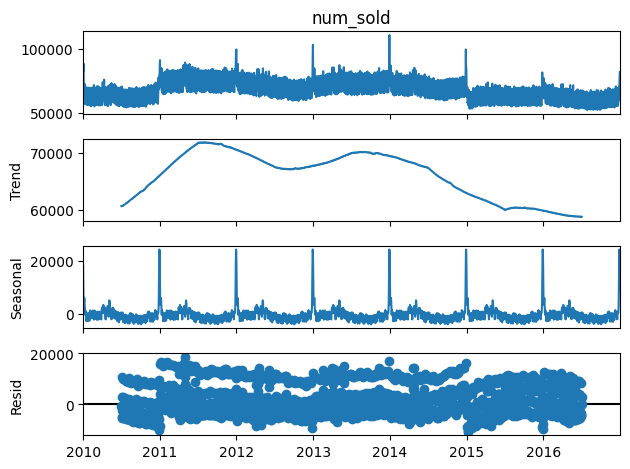

In [ ]:
decomposition = seasonal_decompose(trend_data, model="additive", period=365)

decomposition.plot()
plt.show()

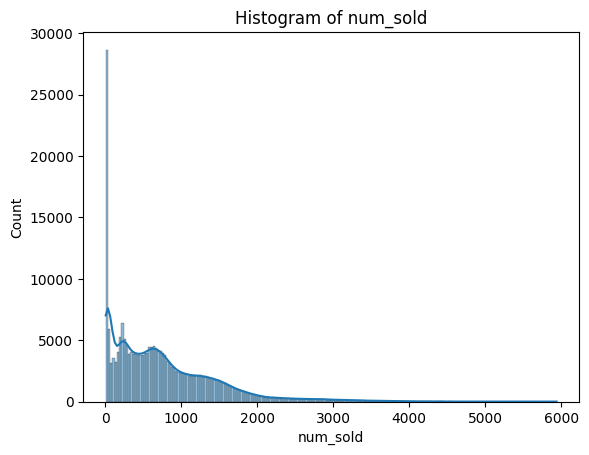

In [ ]:
# Histogram
sns.histplot(train['num_sold'], kde=True)
plt.title('Histogram of num_sold')
plt.show()

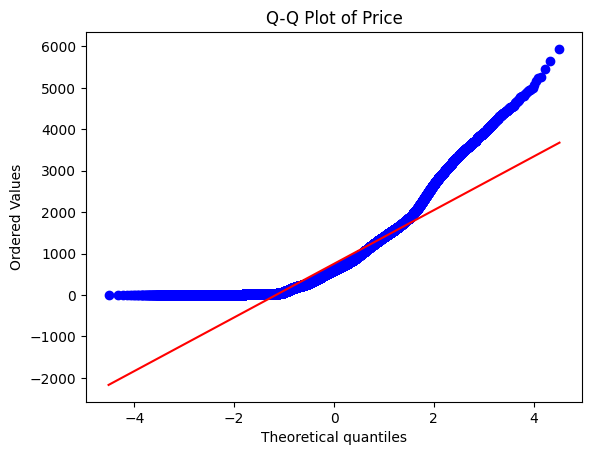

In [ ]:
stats.probplot(train['num_sold'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Price')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

def cramers_v(cat_feature, num_feature):
    cross_tab = pd.crosstab(train[cat_feature], pd.qcut(train[num_feature], q=4))
    chi2 = stats.chi2_contingency(cross_tab)[0]
    n = train.shape[0]
    r, k = cross_tab.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_score = cramers_v("country", "num_sold")
print(f"Cramér's V: {cramers_v_score}")
## Cramér’s V > 0.25 suggests a strong correlation.

Cramér's V: 0.47461830503384994
